# Undistort and Transform Perspective

In [1]:
# !wget https://s3-us-west-1.amazonaws.com/udacity-selfdrivingcar/files/Advanced_Lane_Finding_Images/correct_for_distortion/test_image2.png 

In [2]:
import pickle
import cv2
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

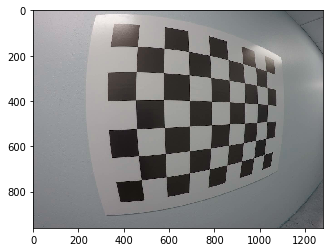

In [3]:
# Read in the saved camera matrix and distortion coefficients
# These are the arrays you calculated using cv2.calibrateCamera()
dist_pickle = pickle.load( open( "./calibration_wide/wide_dist_pickle.p", "rb" ) )
mtx = dist_pickle["mtx"]
dist = dist_pickle["dist"]

# Read in an image
img = cv2.imread('./calibration_wide/test_image2.png')
plt.imshow(img)
nx = 8 # the number of inside corners in x
ny = 6 # the number of inside corners in y

In [4]:
# MODIFY THIS FUNCTION TO GENERATE OUTPUT 
# THAT LOOKS LIKE THE IMAGE ABOVE
def corners_unwarp(img, nx, ny, mtx, dist):
    # Pass in your image into this function
    # Write code to do the following steps
    undistort_img = cv2.undistort(img, mtx, dist)  # 1) Undistort using mtx and dist
    gray = cv2.cvtColor(undistort_img, cv2.COLOR_BGR2GRAY) # 2) Convert to grayscale
    ret, corners = cv2.findChessboardCorners(gray, (8,6), None) # 3) Find the chessboard corners
    if ret == True: # If corners found:
        # Draw and display the corners
        cv2.drawChessboardCorners(undistort_img, (8,6), corners, ret)
        plt.imshow(undistort_img)
        # Choose offset from image corners to plot detected corners
        # This should be chosen to present the result at the proper aspect ratio
        # My choice of 100 pixels is not exact, but close enough for our purpose here
        offset = 200 # offset for dst points
        # Grab the image shape
        img_size = (gray.shape[1], gray.shape[0])

        # For source points I'm grabbing the outer four detected corners
        src = np.float32([corners[0], corners[nx-1], corners[-1], corners[-nx]])
        
        # For destination points, I'm arbitrarily choosing some points to be
        # a nice fit for displaying our warped result 
        # again, not exact, but close enough for our purposes
        dst = np.float32([[offset, offset], [img_size[0]-offset, offset], 
                                     [img_size[0]-offset, img_size[1]-offset], 
                                     [offset, img_size[1]-offset]])
        # Given src and dst points, calculate the perspective transform matrix
        M = cv2.getPerspectiveTransform(src, dst)
        
        # Warp the image using OpenCV warpPerspective()
        warped = cv2.warpPerspective(undistort_img, M, img_size)
    
    return warped, M

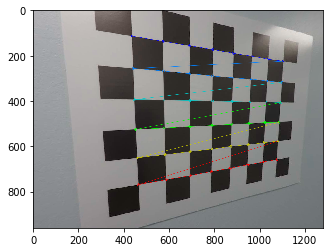

In [5]:
image = np.copy(img)
top_down, perspective_M = corners_unwarp(image, nx, ny, mtx, dist)

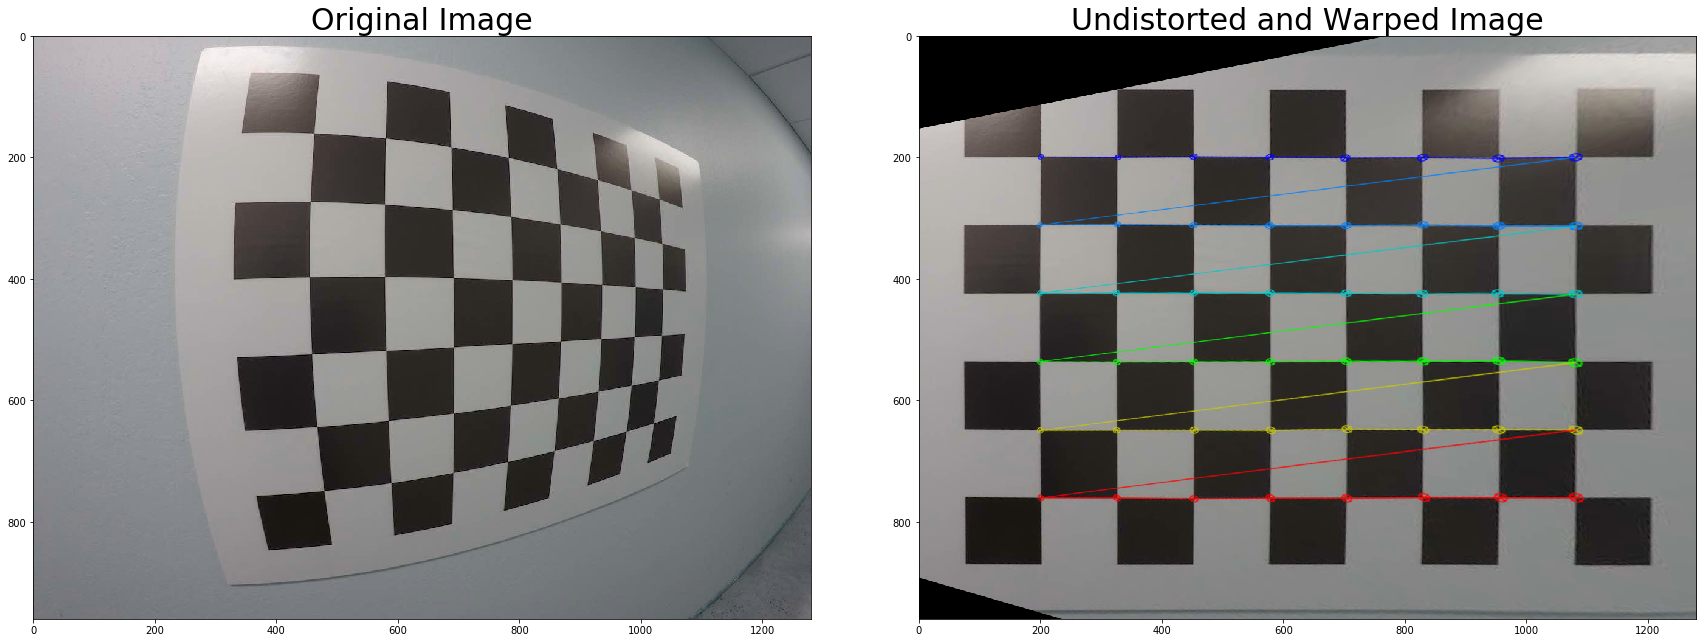

In [6]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(24, 9))
f.tight_layout()
ax1.imshow(img)
ax1.set_title('Original Image', fontsize=30)
ax2.imshow(top_down)
ax2.set_title('Undistorted and Warped Image', fontsize=30)
plt.subplots_adjust(left=0., right=1, top=0.9, bottom=0.)